## General network properties: Articulation points and bridges

In [2]:

import pandas as pd
import seaborn as sns

import config
from config import INTERACTOMES_PATH, DATA_REACTOME_PATH, genes, proteoforms
from lib.graph_database_access import get_pathways
from lib.networks import get_interactomes, get_multiindex, get_combinations

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

config.set_root_wd()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Initial working directory: C:\git\ProteoformNetworks\src\Python
New working directory: c:\git\ProteoformNetworks


## For each interactome

In [3]:
index = get_multiindex()
interactomes_no_sm, interactomes_with_sm, interactomes_with_unique_sm = get_interactomes(DATA_REACTOME_PATH, INTERACTOMES_PATH)
interactomes = [interactomes_no_sm[genes], interactomes_no_sm[proteoforms], interactomes_with_sm[genes], interactomes_with_sm[proteoforms], interactomes_with_unique_sm[genes], interactomes_with_unique_sm[proteoforms]]

Reading participants of all reactions for level genes...
Reading participants of all reactions for level proteins...
Reading participants of all reactions for level proteoforms...
Reading participants of all reactions for level sm...
Reading components of all complexes for level genes...
Reading components of all complexes for level proteins...
Reading components of all complexes for level proteoforms...
Reading components of all complexes for level sm...
Reading interaction network for  at genes level, method no_sm...
Reading interaction network for  at proteins level, method no_sm...
Reading interaction network for  at proteoforms level, method no_sm...
Reading interaction network for  at genes level, method with_sm...
Reading interaction network for  at proteins level, method with_sm...
Reading interaction network for  at proteoforms level, method with_sm...
Reading interaction network for  at genes level, method with_unique_sm...
Reading interaction network for  at proteins level, 

In [4]:
import decimal
from statistics import mean

columns = [
    "Number of Articulation Points",
    "Percentage articulation point nodes",
    "Number of accessioned entities articulation points",
    "Percentage of accessioned entities articulation points",
    "Number of small molecules articulation points",
    "Percentage of small molecules articulation points",
    "Number of interactions",
    "Number of bridge interactions",
    "Percentage of links that are bridges",
    "Percentage of links coming out of the accessioned entities that are bridges",
    "Percentage of links coming out of the small molecules that are bridges"
]


def count_accessioned_entites_art_points(g):
    return sum(g.nodes[n]["Articulation Point"] and not g.nodes[n]['type'].startswith("Simple") for n in g.nodes)


def count_small_molecules_art_points(g):
    return sum(g.nodes[n]["Articulation Point"] and g.nodes[n]['type'].startswith("Simple") for n in g.nodes)


def get_percentage_links_that_are_bridges(g, nodes):
    percentage_bridges_from_node = []
    for node in nodes:
        if len(g.edges(node)) > 0:
            num_bridges = sum(g.edges[e]['Bridge'] for e in g.edges(node))
            percentage_bridges_from_node.append(num_bridges / len(g.edges(node)))
        else:
            percentage_bridges_from_node.append(0)
    return mean(percentage_bridges_from_node)


def get_tuples(interactome):
    percentage_art_points = interactome.graph['Articulation Points'] / interactome.number_of_nodes()
    num_acc_ent_art_points = count_accessioned_entites_art_points(interactome)
    percentage_acc_ent_art_points = num_acc_ent_art_points / interactome.graph['num_entities']
    num_sm_art_points = count_small_molecules_art_points(interactome)
    percentage_sm_art_points = 0
    if interactome.graph['num_small_molecules'] > 0:
        percentage_sm_art_points = num_sm_art_points / interactome.graph['num_small_molecules']
    assert interactome.graph['Articulation Points'] == num_acc_ent_art_points + num_sm_art_points

    percentage_bridges = round(decimal.Decimal(interactome.graph["Bridges"]) / interactome.number_of_edges(), 5)
    acc_ents = list(interactome.nodes)
    percentage_from_sms = 0
    if interactome.graph['num_small_molecules'] > 0:
        acc_ents = [n for n in interactome.nodes if not interactome.nodes[n]['type'].startswith("Simple")]
        sms = [n for n in interactome.nodes if interactome.nodes[n]['type'].startswith("Simple")]
        percentage_from_sms = get_percentage_links_that_are_bridges(interactome, sms)
    percentage_from_acc_ents = get_percentage_links_that_are_bridges(interactome, acc_ents)

    return (
        interactome.graph['Articulation Points'],
        percentage_art_points,
        num_acc_ent_art_points,
        percentage_acc_ent_art_points,
        num_sm_art_points,
        percentage_sm_art_points,
        interactome.number_of_edges(),
        interactome.graph["Bridges"],
        percentage_bridges,
        percentage_from_acc_ents,
        percentage_from_sms
    )


df_br_ap = pd.DataFrame([get_tuples(interactome) for interactome in interactomes],
                        columns=columns,
                        index=index)
df_br_ap

Number of Articulation Points  \
Small Molecules          Entity Level                                  
Not Included             genes                                   267   
                         proteoforms                             351   
Included                 genes                                   244   
                         proteoforms                             254   
Reaction-Unique Included genes                                  2012   
                         proteoforms                            2050   

                                       Percentage articulation point nodes  \
Small Molecules          Entity Level                                        
Not Included             genes                                        0.02   
                         proteoforms                                  0.02   
Included                 genes                                        0.02   
                         proteoforms                                  0.02   
Reaction-Unique Included genes                                        0.05   
                         proteoforms                                  0.05   

                                       Number of accessioned entities articulation points  \
Small Molecules          Entity Level                                                       
Not Included             genes                                                       267    
                         proteoforms                                                 351    
Included                 genes                                                       143    
                         proteoforms                                                 151    
Reaction-Unique Included genes                                                      1600    
                         proteoforms                                                1638    

                                       Percentage of accessioned entities articulation points  \
Small Molecules          Entity Level                                                           
Not Included             genes                                                      0.02        
                         proteoforms                                                0.02        
Included                 genes                                                      0.01        
                         proteoforms                                                0.01        
Reaction-Unique Included genes                                                      0.15        
                         proteoforms                                                0.11        

                                       Number of small molecules articulation points  \
Small Molecules          Entity Level                                                  
Not Included             genes                                                     0   
                         proteoforms                                               0   
Included                 genes                                                   101   
                         proteoforms                                             103   
Reaction-Unique Included genes                                                   412   
                         proteoforms                                             412   

                                       Percentage of small molecules articulation points  \
Small Molecules          Entity Level                                                      
Not Included             genes                                                      0.00   
                         proteoforms                                                0.00   
Included                 genes                                                      0.05   
                         proteoforms                                                0.05   
Reaction-Unique Included genes                            

In [6]:
data = {
    "Bottleneck": ["Articulation Points"] * 6,
    "Percentage": df_br_ap["Percentage articulation point nodes"]
}
df_art_points = pd.DataFrame(data)
df_art_points.reset_index(inplace=True)

data = {
    "Bottleneck": ["Bridges"] * 6,
    "Percentage": df_br_ap["Percentage of links that are bridges"]
}
df_bridges = pd.DataFrame(data)
df_bridges.reset_index(inplace=True)

data_br_ap = pd.concat([df_art_points, df_bridges])
data_br_ap

,Small Molecules,Entity Level,Bottleneck,Percentage
0,Not Included,genes,Articulation Points,0.02
1,Not Included,proteoforms,Articulation Points,0.02
2,Included,genes,Articulation Points,0.02
3,Included,proteoforms,Articulation Points,0.02
4,Reaction-Unique Included,genes,Articulation Points,0.05
5,Reaction-Unique Included,proteoforms,Articulation Points,0.05
0,Not Included,genes,Bridges,0.00140
1,Not Included,proteoforms,Bridges,0.00099
2,Included,genes,Bridges,0.00116
3,Included,proteoforms,Bridges,0.00077


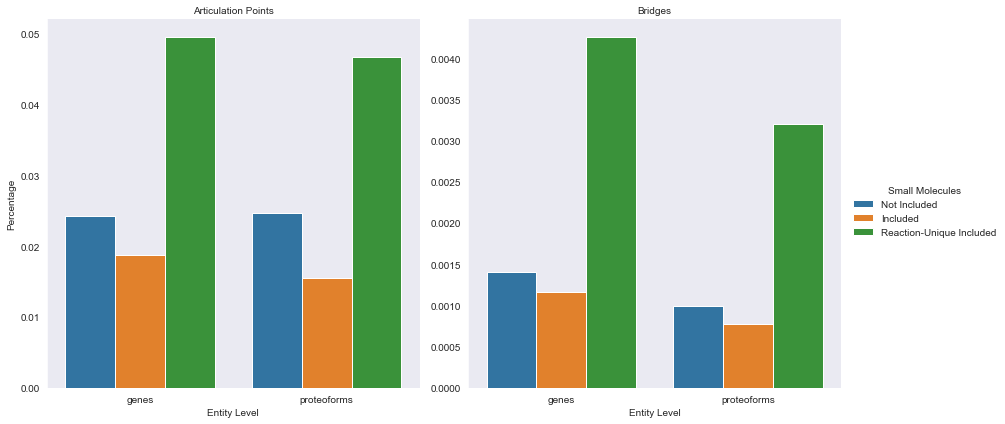

In [7]:
sns.set_style("dark")
f = sns.catplot(x="Entity Level",
                y="Percentage",
                hue="Small Molecules",
                col="Bottleneck",
                data=data_br_ap,
                kind="bar",
                height=6, aspect=1, sharey=False)
f.set_titles("{col_name}")

## For each pathway

In [8]:
from lib.networks import create_pathway_interaction_network
from config import LEVELS, METHODS

# Create all pathway networks
# Sets each node as node as articulation points or not
# Sets each edge as bridge or not
df_pathways = get_pathways()
#for pathway in df_pathways["stId"]:
#    create_pathway_interaction_networks(pathway, "resources/pathway_networks/")
df_pathways

,stId,displayName
0,R-HSA-9613829,Chaperone Mediated Autophagy
1,R-HSA-1632852,Macroautophagy
2,R-HSA-5205685,PINK1-PRKN Mediated Mitophagy
3,R-HSA-8934903,Receptor Mediated Mitophagy
4,R-HSA-9613354,Lipophagy
...,...,...
2107,R-HSA-432722,Golgi Associated Vesicle Biogenesis
2108,R-HSA-432720,Lysosome Vesicle Biogenesis
2109,R-HSA-8856828,Clathrin-mediated endocytosis
2110,R-HSA-8856825,Cargo recognition for clathrin-mediated endocy...


In [10]:


combinations = get_combinations()
combinations[0:30]

[('no_sm', 'genes'),
 ('no_sm', 'proteoforms'),
 ('with_sm', 'genes'),
 ('with_sm', 'proteoforms'),
 ('with_unique_sm', 'genes'),
 ('with_unique_sm', 'proteoforms')]

In [11]:
columns = [
    "Small Molecules", "Entity Level", "Pathway",
    "Number of nodes", "Number of articulation point nodes", "Percentage of articulation point nodes",
    "Number of accessioned entities articulation points", "Percentage of accessioned entities articulation points",
    "Number of small molecule articulation points", "Percentage of small molecules that are articulation points",

    "Number of links", "Number of links bridges", "Percentage of bridge links",
    "Percentage of bridge links from accessioned entities",
    "Percentage of bridge links from small molecules"
]

out_path = "resources/pathway_networks/"


def get_tuples(combination):
    G = create_pathway_interaction_network(
        method=combination[0], level=combination[1], pathway=combination[2], out_path=out_path
    )

    percentage_art_points = G.graph['Articulation Points'] / G.number_of_nodes()
    num_acc_ent_art_points = count_accessioned_entites_art_points(G)
    percentage_acc_ent_art_points = num_acc_ent_art_points / G.graph['num_entities']
    num_sm_art_points = count_small_molecules_art_points(G)
    percentage_sm_art_points = 0
    if G.graph['num_small_molecules'] > 0:
        percentage_sm_art_points = num_sm_art_points / G.graph['num_small_molecules']
    assert G.graph['Articulation Points'] == num_acc_ent_art_points + num_sm_art_points

    percentage_bridges = 0
    if G.number_of_edges() > 0:
        percentage_bridges = round(decimal.Decimal(G.graph["Bridges"]) / G.number_of_edges(), 5)
    acc_ents = list(G.nodes)
    percentage_from_sms = 0
    if G.graph['num_small_molecules'] > 0:
        acc_ents = [n for n in G.nodes if not G.nodes[n]['type'].startswith("Simple")]
        sms = [n for n in G.nodes if G.nodes[n]['type'].startswith("Simple")]
        percentage_from_sms = get_percentage_links_that_are_bridges(G, sms)
    percentage_from_acc_ents = get_percentage_links_that_are_bridges(G, acc_ents)

    return (
        combination[0], combination[1], combination[2],
        G.number_of_nodes(), G.graph['Articulation Points'], percentage_art_points,
        num_acc_ent_art_points, percentage_acc_ent_art_points,
        num_sm_art_points, percentage_sm_art_points,

        G.number_of_edges(), G.graph["Bridges"], float(percentage_bridges),
        percentage_from_acc_ents,
        percentage_from_sms
    )

In [12]:
df_br_ap_pathways = pd.DataFrame([get_tuples(combination) for combination in combinations], columns=columns)
df_br_ap_pathways

IndexError: tuple index out of range

In [ ]:
df_br_ap_pathways.dtypes

In [ ]:
df_pathways_grouped = df_br_ap_pathways.groupby(['Small Molecules', 'Entity Level']).agg(
    {
        "Number of nodes": ['mean'],
        "Number of articulation point nodes": ['mean'],
        "Percentage of articulation point nodes": ['mean'],
        "Number of accessioned entities articulation points": ['mean'],
        "Percentage of accessioned entities articulation points": ['mean'],
        "Number of small molecule articulation points": ['mean'],
        "Percentage of small molecules that are articulation points": ['mean'],
        "Number of links": ['mean'],
        "Number of links bridges": ['mean'],
        "Percentage of bridge links": ['mean'],
        "Percentage of bridge links from accessioned entities": ['mean'],
        "Percentage of bridge links from small molecules": ['mean']
    })
df_pathways_grouped.columns = [
    "Number of nodes", "Number of articulation point nodes", "Percentage of articulation point nodes",
    "Number of accessioned entities articulation points", "Percentage of accessioned entities articulation points",
    "Number of small molecule articulation points", "Percentage of small molecules that are articulation points",
    "Number of links", "Number of links bridges", "Percentage of bridge links",
    "Percentage of bridge links from accessioned entities",
    "Percentage of bridge links from small molecules"
]
df_pathways_grouped = df_pathways_grouped.set_index(get_multiindex())

df_pathways_grouped

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 6))
fig.set_size_inches(10, 6)
f = sns.violinplot(x="Small Molecules", y="Percentage of articulation point nodes", hue="Entity Level",
                   data=df_br_ap_pathways, palette=config.COLORS_BORDER)
#ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$")) # Convert ticks to powers of 10
f.legend(loc='center left', bbox_to_anchor=(1, 0.5))
f.set_title("Percentage of articulation point nodes in Pathways")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
fig.set_size_inches(10, 6)
df_br_ap_pathways["Percentage of bridge links"] = df_br_ap_pathways["Percentage of bridge links"].astype('float64')
f2 = sns.violinplot(x="Small Molecules", y="Percentage of bridge links", hue="Entity Level",
                    data=df_br_ap_pathways, palette=config.COLORS_BORDER)
f2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
f2.set_title("Percentage of bridge links in Pathways")

In [ ]:
data = {
    "Bottleneck": ["Articulation Points"] * len(df_br_ap_pathways),
    "Small Molecules": df_br_ap_pathways["Small Molecules"],
    "Entity Level": df_br_ap_pathways["Entity Level"],
    "Pathway": df_br_ap_pathways["Pathway"],
    "Percentage": df_br_ap_pathways["Percentage of articulation point nodes"]
}
df_art_points = pd.DataFrame(data)
df_art_points

In [ ]:
data = {
    "Bottleneck": ["Bridges"] * len(df_br_ap_pathways),
    "Small Molecules": df_br_ap_pathways["Small Molecules"],
    "Entity Level": df_br_ap_pathways["Entity Level"],
    "Pathway": df_br_ap_pathways["Pathway"],
    "Percentage": df_br_ap_pathways["Percentage of bridge links"]
}
df_bridges = pd.DataFrame(data)
df_bridges

In [ ]:
data_br_ap = pd.concat([df_art_points, df_bridges])
data_br_ap

In [ ]:
sns.set_style("dark")
f = sns.catplot(x="Entity Level",
                y="Percentage",
                hue="Small Molecules",
                col="Bottleneck",
                data=data_br_ap,
                kind="violin",
                height=6, aspect=1, sharey=False)
f.set_titles("{col_name}")